# Market Basket Analysis

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

Importing libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

load data

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


data describtion

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

graphs and plots

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

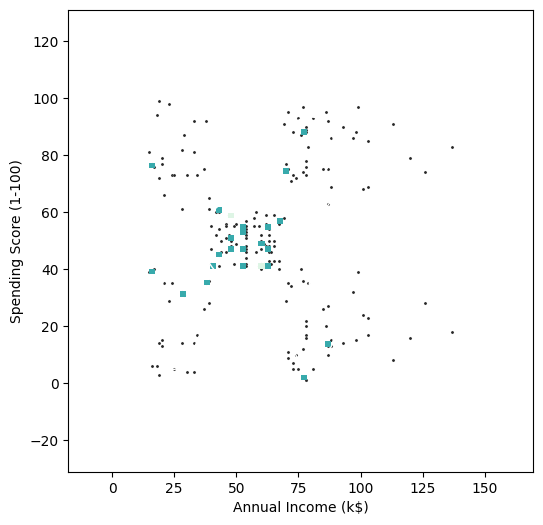

In [7]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], s=5, color=".15")
sns.histplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], levels=5, color="w", linewidths=1)


**draw histogram for Age,Annual Income,Spending Score and vertical linr for mean and median**


age-->mean value is 40 median 36


Annual Income-->mean and median 60 avg



Spending Score-->mean and median 50

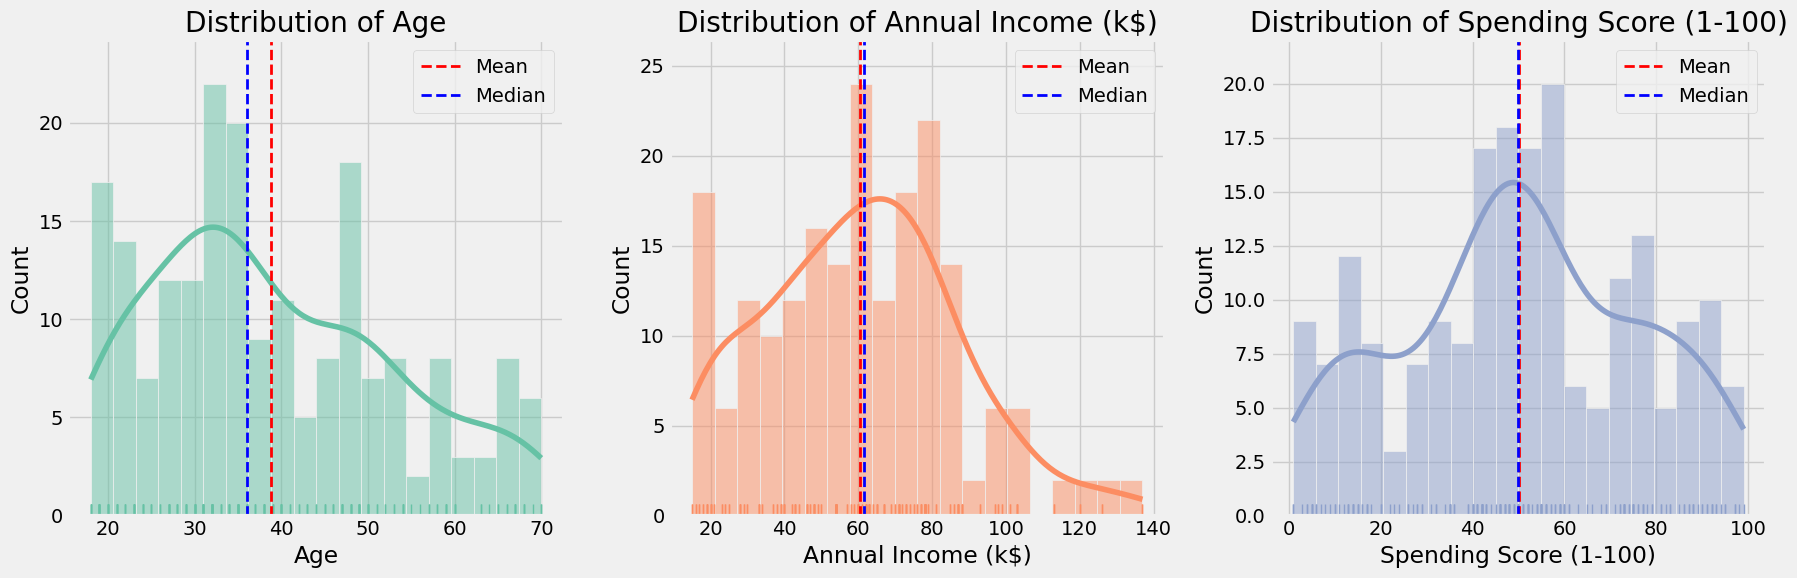

In [8]:
palette = sns.color_palette("Set2")

plt.style.use('fivethirtyeight')
plt.figure(1, figsize=(18, 6))

for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)

    # Plot the histogram with KDE
    sns.histplot(df[feature], bins=20, kde=True, color=palette[i-1])

    # Add rug plot separately
    sns.rugplot(df[feature], color=palette[i-1])

    # Add vertical lines for mean and median
    plt.axvline(df[feature].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(df[feature].median(), color='b', linestyle='dashed', linewidth=2, label='Median')

    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()


draw boxplot to visualize the distribution of spending scores for each gender

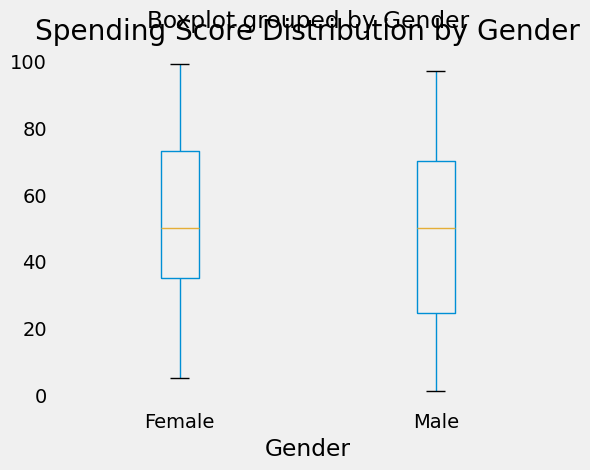

T-test p-value: 0.4137446589852174


In [9]:
# Descriptive statistics
summary_stats = df.groupby('Gender')['Spending Score (1-100)'].describe()

# Visualization
df.boxplot(column='Spending Score (1-100)', by='Gender', grid=False)
plt.title('Spending Score Distribution by Gender')

plt.show()

# Statistical analysis (example using t-test)
from scipy.stats import ttest_ind

men_scores = df[df['Gender'] == 'Male']['Spending Score (1-100)']
women_scores = df[df['Gender'] == 'Female']['Spending Score (1-100)']

t_stat, p_value = ttest_ind(men_scores, women_scores)
print(f'T-test p-value: {p_value}')


 calculates the total spending scores for men and women and then creates a pie chart to show the proportion of spending scores for each gender

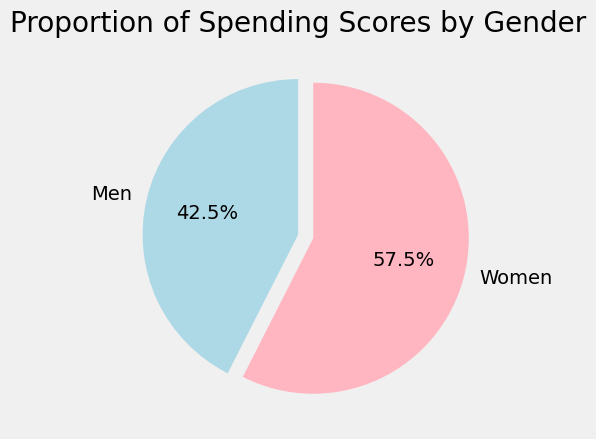

In [10]:
total_men_score = men_scores.sum()
total_women_score = women_scores.sum()
# Sizes for each section of the pie chart
sizes = [total_men_score, total_women_score]
labels = ['Men', 'Women']
colors = ['lightblue', 'lightpink']

# Exploding the Women section for emphasis
explode = (0, 0.1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=explode)
plt.title('Proportion of Spending Scores by Gender')
plt.show()

draw violinplot for gender and data
draw swarmplot for gender and data
       in col age,annual income,spending score

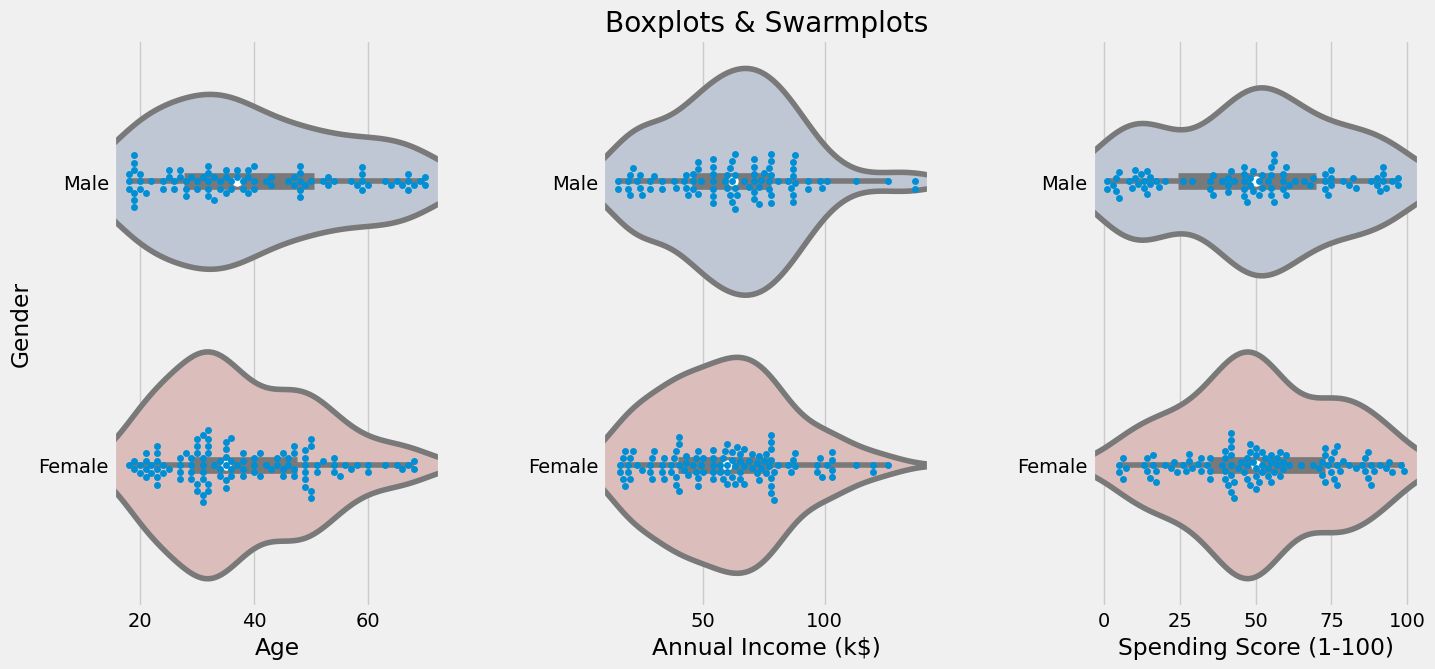

In [11]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

draw count plot to draw graph between male and female
Percentage for woman

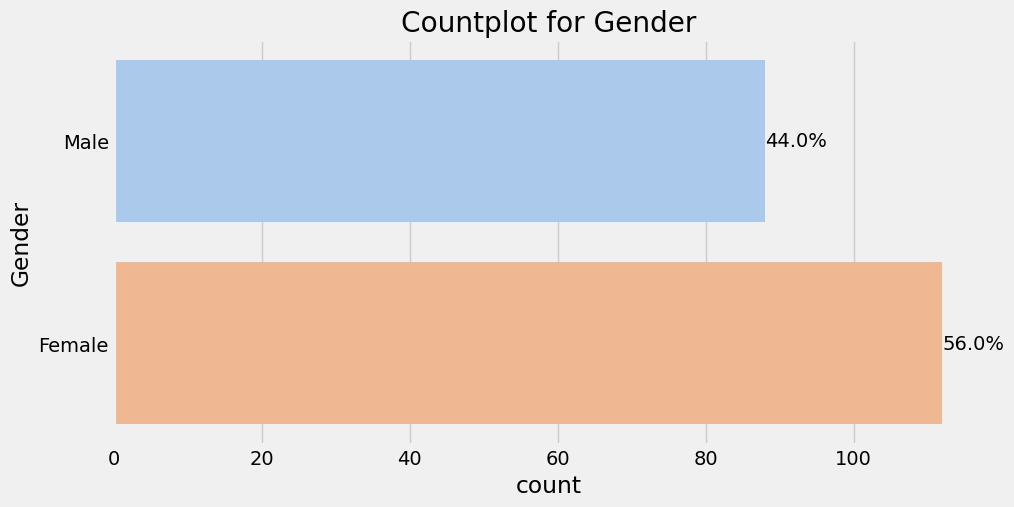

In [12]:
# Use a color palette for better visualization
palette = sns.color_palette("pastel")

plt.figure(1, figsize=(10, 5))

# Countplot for Gender
sns.countplot(y="Gender", data=df, palette=palette)

# Add percentages on the bars
total = len(df['Gender'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    plt.annotate(percentage, (x, y), ha='left', va='center')

plt.title('Countplot for Gender')
plt.show()

draw scatter plot for all data with gender

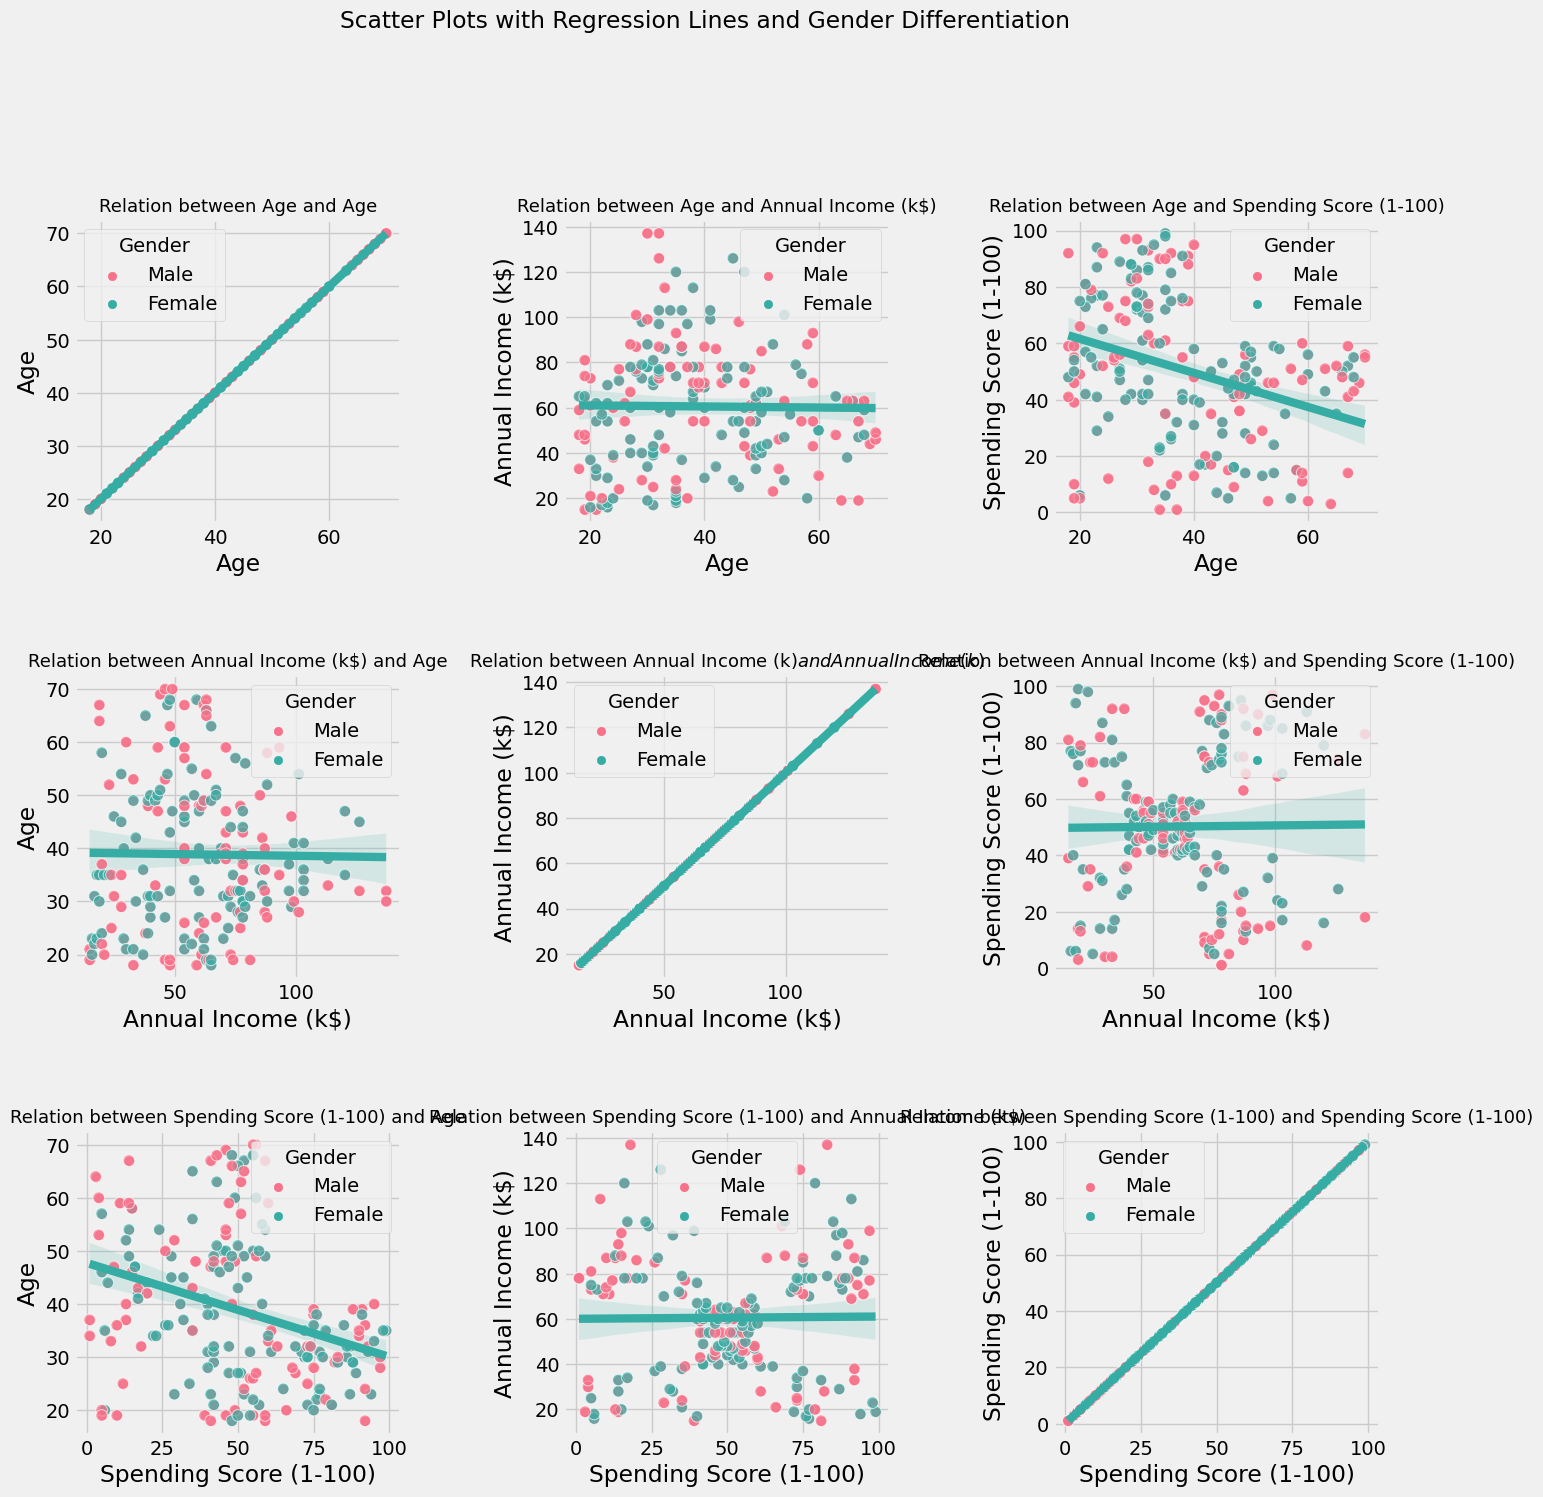

In [13]:
plt.style.use("fivethirtyeight")
plt.figure(1, figsize=(15, 15))
n = 0

# Define a color palette for better visualization
palette = sns.color_palette("husl", 2)

for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)

        # Scatter plot with regression line
        sns.regplot(x=i, y=y, data=df, scatter_kws={'color': palette[0]}, line_kws={'color': palette[1]})

        # Add points with different colors based on Gender
        sns.scatterplot(x=i, y=y, hue='Gender', data=df, palette=palette, s=70, alpha=0.7)

        plt.xlabel(i)
        plt.ylabel(y)
        plt.title(f'Relation between {i} and {y}', fontsize = 13)

plt.suptitle('Scatter Plots with Regression Lines and Gender Differentiation', y=1.02)
plt.show()

draw scatter between annual income and age

<ipython-input-14-3c8d9b1523ea>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x="Annual Income (k$)", y="Age", data=subset, s=100, alpha=0.7, label=x, c=palette.pop(0))


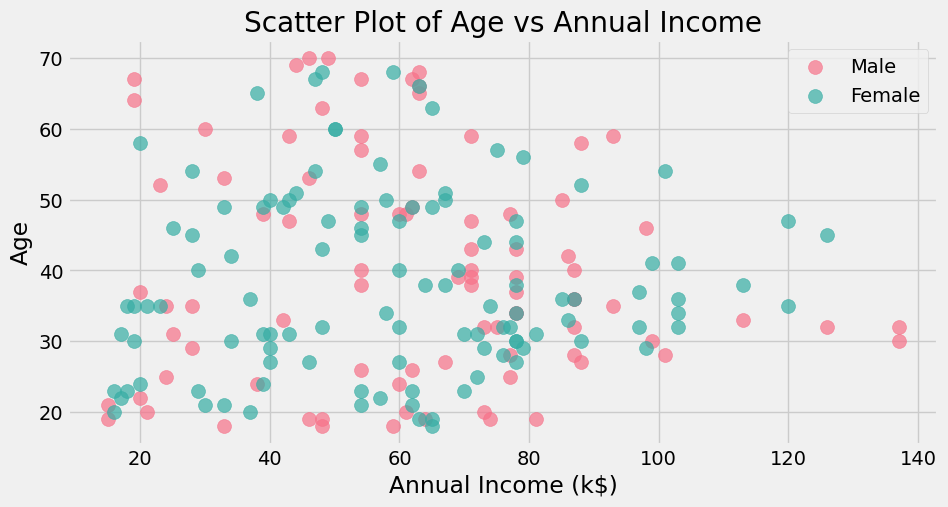

In [14]:
plt.figure(1, figsize=(10, 5))


for x in ["Male", "Female"]:
    subset = df[df["Gender"] == x]
    plt.scatter(x="Annual Income (k$)", y="Age", data=subset, s=100, alpha=0.7, label=x, c=palette.pop(0))

plt.xlabel("Annual Income (k$)")
plt.ylabel("Age")
plt.title("Scatter Plot of Age vs Annual Income")
plt.legend()
plt.show()

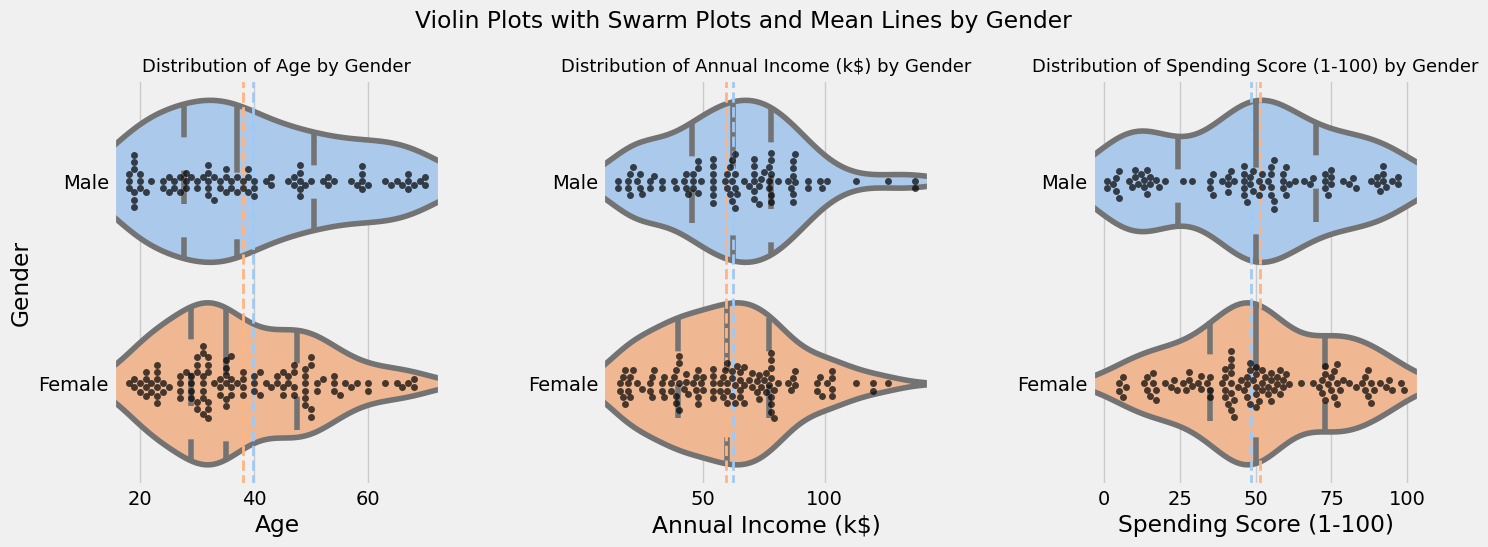

In [15]:
plt.figure(1, figsize=(15, 5))
n = 0

# Use a color palette for better visualization
palette = sns.color_palette("pastel")

for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    # Violin plot with statistical summary
    sns.violinplot(x=cols, y='Gender', data=df, palette=palette, inner="quartile", scale="width")

    # Swarm plot to show individual data points
    sns.swarmplot(x=cols, y='Gender', data=df, color='black', alpha=0.7)

    # Add mean lines for each category
    plt.axvline(df.groupby('Gender')[cols].mean().loc['Male'], color=palette[0], linestyle='dashed', linewidth=2)
    plt.axvline(df.groupby('Gender')[cols].mean().loc['Female'], color=palette[1], linestyle='dashed', linewidth=2)

    plt.ylabel('Gender' if n == 1 else '')
    plt.title(f'Distribution of {cols} by Gender', fontsize = 13)

plt.suptitle('Violin Plots with Swarm Plots and Mean Lines by Gender', y=1.02)
plt.show()

draw heat map for correlation matrix (age,annual income,spending score)

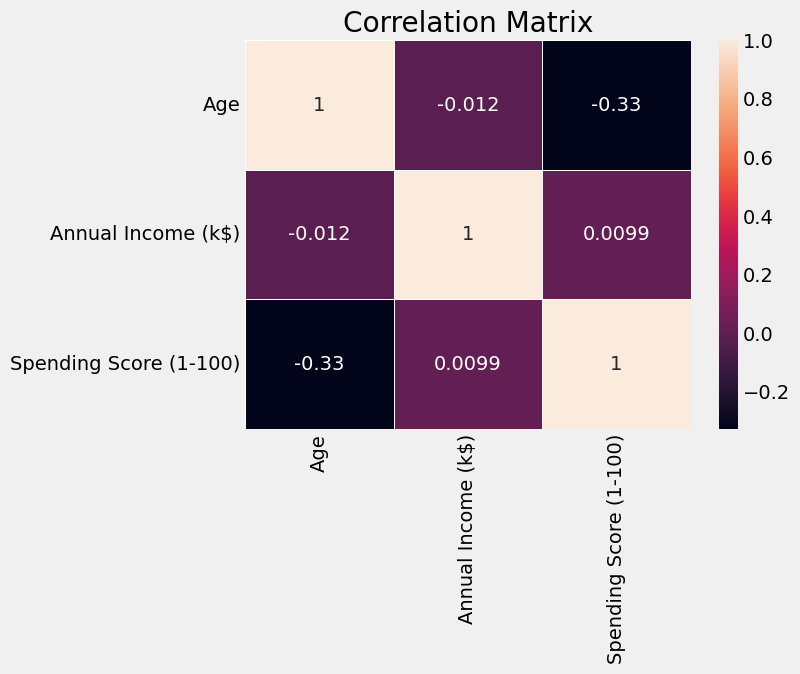

In [16]:
# Correlation Analysis
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True,  linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-17-90fef38c9ffe>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", data=subset, s=100, alpha=0.7, label=x, c=palette.pop(0))


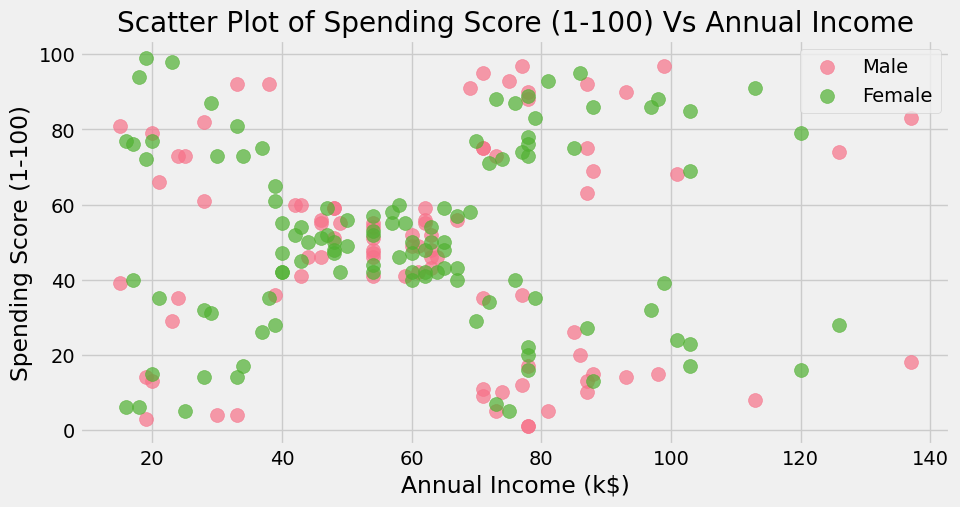

In [17]:
plt.figure(1, figsize=(10, 5))

# Use a color palette for better visualization
palette = sns.color_palette("husl", 3)

for x in ["Male", "Female"]:
    subset = df[df["Gender"] == x]
    plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", data=subset, s=100, alpha=0.7, label=x, c=palette.pop(0))

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Scatter Plot of Spending Score (1-100) Vs Annual Income")
plt.legend()
plt.show()

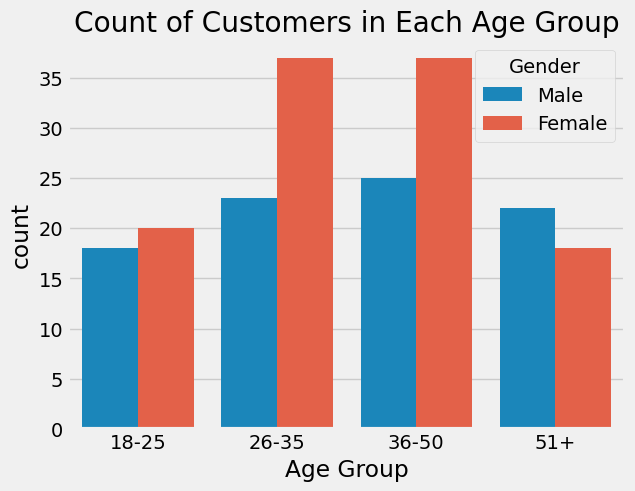

In [18]:
# Age Group Analysis with bins bine
bins = [0, 25, 35, 50, 100]
labels = ['18-25', '26-35', '36-50', '51+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
sns.countplot(x='Age Group', data=df, hue='Gender')
plt.title('Count of Customers in Each Age Group')
plt.show()

# K-Means Cluster

In [20]:
X = df.iloc[:,[3,4]].values

choose the number of clusters (k)

In [21]:
#WCSS -> Within Clusters Sum of Squares
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

identify num of clusters based on plot, it seems 5 is good

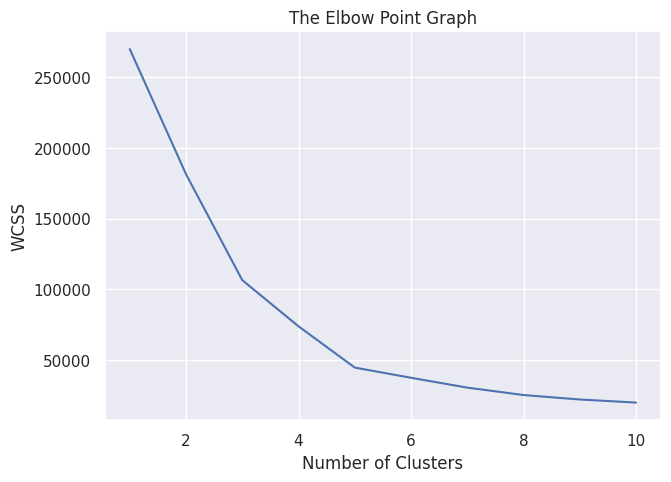

In [22]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

return a label for each data point based on their cluster

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


plot the centroids

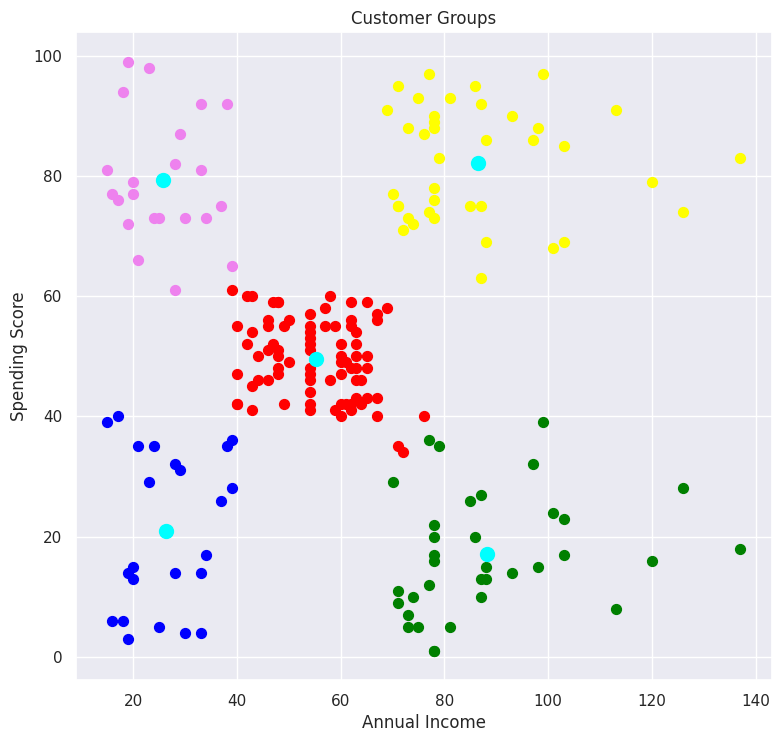

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

what happen if selected num of cludters=7

In [25]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 6 1 6 1 6 1
 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


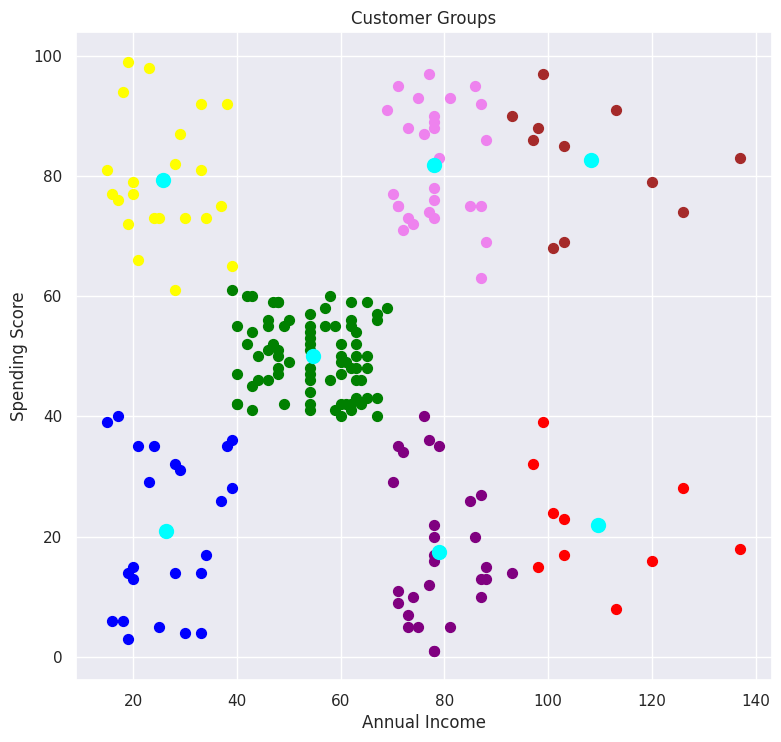

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='purple', label='Cluster 6')
plt.scatter(X[Y==6,0], X[Y==6,1], s=50, c='brown', label='Cluster 7')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

as we see its indiscriminate plot